Importing the Necessary Packages

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


Fetching the Datasets

In [10]:
# Load the dataset
df = pd.read_csv('preprocessed_telecom_xdr_data.csv')

# Display the first few rows
df.head()


,Bearer Id,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,42.000000,5.000000,23.0,44.0,21.006809,...,15.854611,2.501332,8.198936,9.656251,278.082303,14.344150,171.744450,8.814393,36.749741,308.879636
1,1.311448e+19,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,65.000000,5.000000,16.0,26.0,21.006809,...,20.247395,19.111729,18.338413,17.227132,608.750074,1.170709,526.904238,15.055145,53.800391,653.384965
2,1.311448e+19,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,106.199942,17.628232,6.0,9.0,21.006809,...,19.725661,14.699576,17.587794,6.163408,229.584621,0.395630,410.692588,4.215763,27.883638,279.807335
3,1.311448e+19,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,106.199942,17.628232,44.0,44.0,21.006809,...,21.388122,15.146643,13.994646,1.097942,799.538153,10.849722,749.039933,12.797283,43.324218,455.940801
4,1.311448e+19,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,106.199942,17.628232,6.0,9.0,21.006809,...,15.259380,18.962873,17.124581,0.415218,527.707248,3.529801,550.709500,13.910322,38.542814,569.138589


In [11]:
df_aggregated = pd.read_csv('engagement_data.csv')

df_aggregated.head()


,Customer ID,Total Duration (ms),Total Download (Bytes),Total Upload (Bytes),Session Frequency,Total Traffic (Bytes),Engagement Cluster
0,3.360100e+10,116720.0,455.940801,36.053108,1,491.993908,1
1,3.360100e+10,181230.0,120.755184,36.104459,1,156.859643,1
2,3.360100e+10,134969.0,556.659663,39.306820,1,595.966483,1
3,3.360101e+10,49878.0,401.993172,20.327526,1,422.320698,1
4,3.360101e+10,37104.0,1363.130417,94.280527,2,1457.410944,0


TASK 3.1- AGGREGATE PER CUSTOMER

In [12]:
# Necessary columns for aggregation
columns_needed = [
    'MSISDN/Number',
    'Handset Type',
    'TCP DL Retrans. Vol (Bytes)',
    'TCP UL Retrans. Vol (Bytes)',
    'Avg RTT DL (ms)',
    'Avg RTT UL (ms)',
    'Avg Bearer TP DL (kbps)',
    'Avg Bearer TP UL (kbps)'
]

# Create a new DataFrame with only the necessary columns
df_subset = df[columns_needed]

# Display the DataFrame
df_subset.head()


,MSISDN/Number,Handset Type,TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps)
0,3.366496e+10,Samsung Galaxy A5 Sm-A520F,21.006809,0.771052,42.000000,5.000000,23.0,44.0
1,3.368185e+10,Samsung Galaxy J5 (Sm-J530),21.006809,0.771052,65.000000,5.000000,16.0,26.0
2,3.376063e+10,Samsung Galaxy A8 (2018),21.006809,0.771052,106.199942,17.628232,6.0,9.0
3,3.375034e+10,undefined,21.006809,0.771052,106.199942,17.628232,44.0,44.0
4,3.369980e+10,Samsung Sm-G390F,21.006809,0.771052,106.199942,17.628232,6.0,9.0


In [13]:
# Aggregate per customer
customer_agg = df_subset.groupby('MSISDN/Number').agg({
    'Handset Type': 'first',  # Assuming one handset type per customer
    'TCP DL Retrans. Vol (Bytes)': 'mean',
    'TCP UL Retrans. Vol (Bytes)': 'mean',
    'Avg RTT DL (ms)': 'mean',
    'Avg RTT UL (ms)': 'mean',
    'Avg Bearer TP DL (kbps)': 'mean',
    'Avg Bearer TP UL (kbps)': 'mean'
}).reset_index()

# Calculate combined metrics
customer_agg['Avg TCP Retransmission (Bytes)'] = customer_agg['TCP DL Retrans. Vol (Bytes)'] + customer_agg['TCP UL Retrans. Vol (Bytes)']
customer_agg['Avg RTT (ms)'] = customer_agg['Avg RTT DL (ms)'] + customer_agg['Avg RTT UL (ms)']
customer_agg['Avg Throughput (kbps)'] = customer_agg['Avg Bearer TP DL (kbps)'] + customer_agg['Avg Bearer TP UL (kbps)']

# Drop the individual columns
customer_agg = customer_agg.drop(columns=[
    'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
    'Avg RTT DL (ms)', 'Avg RTT UL (ms)',
    'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)'
])

# Display the aggregated DataFrame
customer_agg.head()


,MSISDN/Number,Handset Type,Avg TCP Retransmission (Bytes),Avg RTT (ms),Avg Throughput (kbps)
0,3.360100e+10,Huawei P20 Lite Huawei Nova 3E,21.777861,46.000000,76.0
1,3.360100e+10,Apple iPhone 7 (A1778),21.777861,31.000000,99.0
2,3.360100e+10,undefined,21.777861,123.828174,97.0
3,3.360101e+10,Apple iPhone 5S (A1457),0.772118,84.000000,248.0
4,3.360101e+10,Apple iPhone Se (A1723),15.574346,59.500000,20248.5


Task 3.2: Compute & List Top, Bottom, and Most Frequent Values

a. TCP Retransmission Values

In [14]:
# Top 10 TCP retransmission values
top_10_tcp = customer_agg.nlargest(10, 'Avg TCP Retransmission (Bytes)')[['MSISDN/Number', 'Avg TCP Retransmission (Bytes)']]
print("Top 10 TCP Retransmission Values:")
print(top_10_tcp)

# Bottom 10 TCP retransmission values (excluding zeros if any)
bottom_10_tcp = customer_agg[customer_agg['Avg TCP Retransmission (Bytes)'] > 0].nsmallest(10, 'Avg TCP Retransmission (Bytes)')[['MSISDN/Number', 'Avg TCP Retransmission (Bytes)']]
print("\nBottom 10 TCP Retransmission Values:")
print(bottom_10_tcp)

# Most frequent TCP retransmission values
most_freq_tcp = customer_agg['Avg TCP Retransmission (Bytes)'].value_counts().head(10)
print("\nMost Frequent TCP Retransmission Values:")
print(most_freq_tcp)


Top 10 TCP Retransmission Values:
    MSISDN/Number  Avg TCP Retransmission (Bytes)
0    3.360100e+10                       21.777861
1    3.360100e+10                       21.777861
2    3.360100e+10                       21.777861
8    3.360101e+10                       21.777861
10   3.360102e+10                       21.777861
12   3.360102e+10                       21.777861
13   3.360102e+10                       21.777861
14   3.360103e+10                       21.777861
16   3.360103e+10                       21.777861
18   3.360103e+10                       21.777861

Bottom 10 TCP Retransmission Values:
        MSISDN/Number  Avg TCP Retransmission (Bytes)
23369    3.365013e+10                        0.000097
6326     3.361478e+10                        0.000128
96625    3.376206e+10                        0.000129
13487    3.362636e+10                        0.000134
2162     3.360783e+10                        0.000143
25752    3.365068e+10                        0.000176


b. RTT Values

In [15]:
# Top 10 RTT values
top_10_rtt = customer_agg.nlargest(10, 'Avg RTT (ms)')[['MSISDN/Number', 'Avg RTT (ms)']]
print("\nTop 10 RTT Values:")
print(top_10_rtt)

# Bottom 10 RTT values (excluding zeros if any)
bottom_10_rtt = customer_agg[customer_agg['Avg RTT (ms)'] > 0].nsmallest(10, 'Avg RTT (ms)')[['MSISDN/Number', 'Avg RTT (ms)']]
print("\nBottom 10 RTT Values:")
print(bottom_10_rtt)

# Most frequent RTT values
most_freq_rtt = customer_agg['Avg RTT (ms)'].value_counts().head(10)
print("\nMost Frequent RTT Values:")
print(most_freq_rtt)



Top 10 RTT Values:
        MSISDN/Number  Avg RTT (ms)
47806    3.366232e+10       96924.0
79950    3.368369e+10       54848.0
41789    3.366087e+10       32335.0
93502    3.376094e+10       26978.0
1701     3.360679e+10       26257.0
73972    3.367182e+10       25609.0
103954   3.378187e+10       25388.0
105374   3.378401e+10       24738.0
85368    3.369855e+10       22968.5
15347    3.362963e+10       20980.0

Bottom 10 RTT Values:
       MSISDN/Number  Avg RTT (ms)
38918   3.366020e+10           2.0
83084   3.369505e+10           4.0
35896   3.365949e+10           5.0
69411   3.366862e+10           6.0
65855   3.366748e+10           7.0
21884   3.364768e+10           8.0
3861    3.361085e+10           9.0
74166   3.367220e+10           9.0
17790   3.363468e+10          10.0
2575    3.360874e+10          11.0

Most Frequent RTT Values:
Avg RTT (ms)
123.828174    18507
29.000000      2969
39.000000      2417
38.000000      1670
40.000000      1629
30.000000      1596
28.000000      1

c. Throughput Values


In [24]:
# Top 10 Throughput values
top_10_throughput = customer_agg.nlargest(10, 'Avg Throughput (kbps)')[['MSISDN/Number', 'Avg Throughput (kbps)']]
print("\nTop 10 Throughput Values:")
print(top_10_throughput)

# Bottom 10 Throughput values (excluding zeros if any)
bottom_10_throughput = customer_agg[customer_agg['Avg Throughput (kbps)'] > 0].nsmallest(10, 'Avg Throughput (kbps)')[['MSISDN/Number', 'Avg Throughput (kbps)']]
print("\nBottom 10 Throughput Values:")
print(bottom_10_throughput)

# Most frequent Throughput values
most_freq_throughput = customer_agg['Avg Throughput (kbps)'].value_counts().head(10)
print("\nMost Frequent Throughput Values:")
print(most_freq_throughput)



Top 10 Throughput Values:
       MSISDN/Number  Avg Throughput (kbps)
33764   3.365904e+10                72602.0
88971   3.369967e+10                72416.0
94053   3.376118e+10                71794.0
57833   3.366491e+10                71766.0
79158   3.368207e+10                71635.0
21627   3.364688e+10                71537.0
70983   3.366916e+10                71409.0
86520   3.369891e+10                71130.0
24124   3.365031e+10                70999.0
16723   3.363254e+10                70450.0

Bottom 10 Throughput Values:
      MSISDN/Number  Avg Throughput (kbps)
7206   3.361619e+10                    0.5
226    3.360145e+10                    1.0
499    3.360250e+10                    1.0
874    3.360349e+10                    1.0
1029   3.360375e+10                    1.0
4429   3.361175e+10                    1.0
4543   3.361194e+10                    1.0
4784   3.361230e+10                    1.0
5528   3.361356e+10                    1.0
5831   3.361401e+10          

Task 3.3: Compute & Report Distributions

d. Distribution of Average Throughput per Handset Type

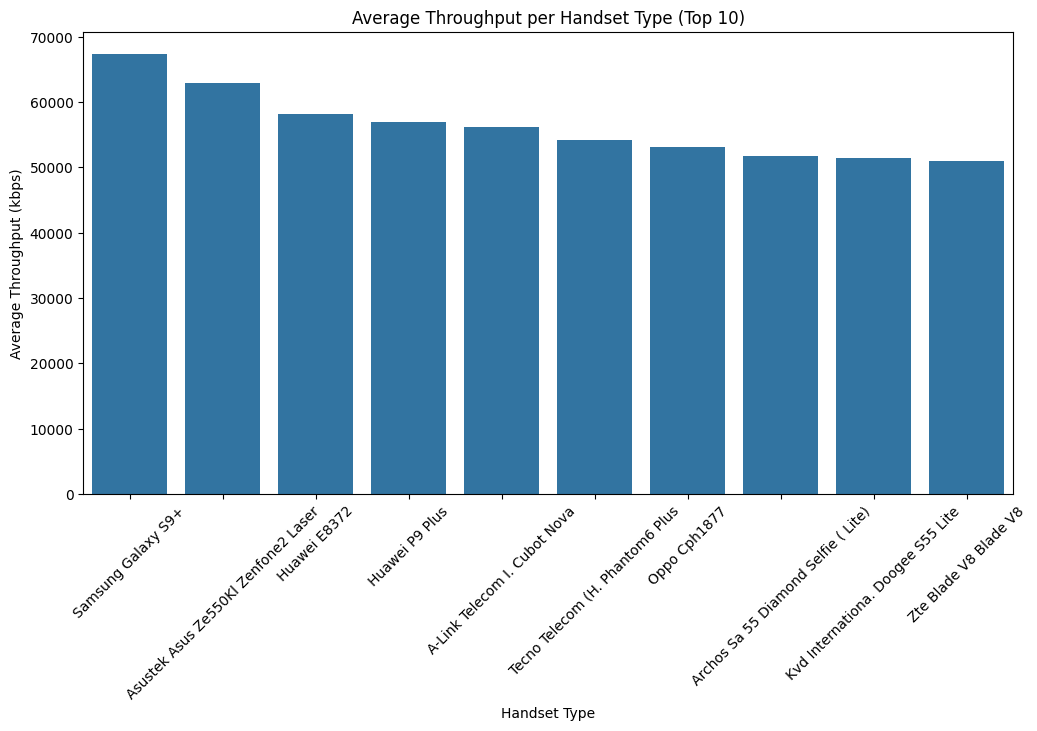

In [25]:
# Group by Handset Type and compute average throughput
throughput_per_handset = customer_agg.groupby('Handset Type')['Avg Throughput (kbps)'].mean().reset_index()

# Sort values for better visualization
throughput_per_handset = throughput_per_handset.sort_values(by='Avg Throughput (kbps)', ascending=False)

# Plot the distribution
plt.figure(figsize=(12,6))
sns.barplot(x='Handset Type', y='Avg Throughput (kbps)', data=throughput_per_handset.head(10))
plt.xticks(rotation=45)
plt.title('Average Throughput per Handset Type (Top 10)')
plt.ylabel('Average Throughput (kbps)')
plt.xlabel('Handset Type')
plt.show()


e. Average TCP Retransmission per Handset Type

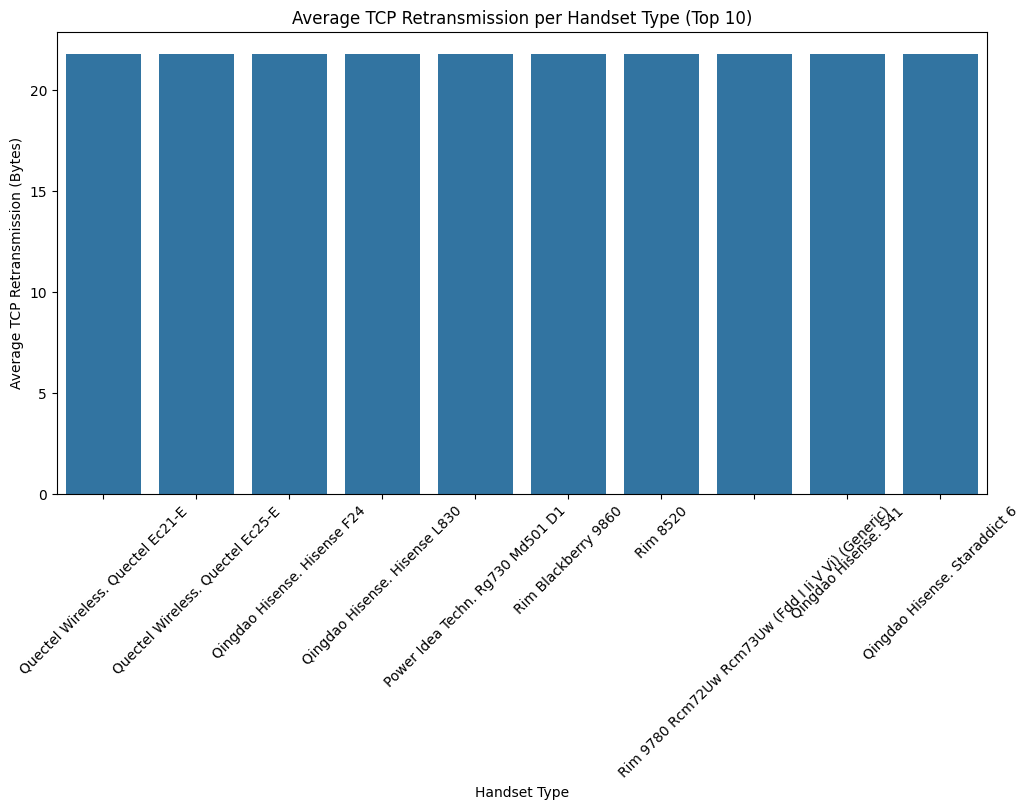

In [26]:
# Group by Handset Type and compute average TCP retransmission
tcp_retrans_per_handset = customer_agg.groupby('Handset Type')['Avg TCP Retransmission (Bytes)'].mean().reset_index()

# Sort values for better visualization
tcp_retrans_per_handset = tcp_retrans_per_handset.sort_values(by='Avg TCP Retransmission (Bytes)', ascending=False)

# Plot the distribution
plt.figure(figsize=(12,6))
sns.barplot(x='Handset Type', y='Avg TCP Retransmission (Bytes)', data=tcp_retrans_per_handset.head(10))
plt.xticks(rotation=45)
plt.title('Average TCP Retransmission per Handset Type (Top 10)')
plt.ylabel('Average TCP Retransmission (Bytes)')
plt.xlabel('Handset Type')
plt.show()


Task 3.4: K-Means Clustering (k=3)

Prepare Data for Clustering

In [27]:
# Select the features for clustering
clustering_features = customer_agg[['Avg TCP Retransmission (Bytes)', 'Avg RTT (ms)', 'Avg Throughput (kbps)']]

# Handle any potential missing values (if any)
clustering_features = clustering_features.fillna(clustering_features.mean())

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_features)


In [28]:
# Apply k-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
customer_agg['Experience Cluster'] = kmeans.fit_predict(scaled_features)


In [29]:
# Analyze the clusters
cluster_summary = customer_agg.groupby('Experience Cluster').agg({
    'Avg TCP Retransmission (Bytes)': 'mean',
    'Avg RTT (ms)': 'mean',
    'Avg Throughput (kbps)': 'mean',
    'MSISDN/Number': 'count'
}).rename(columns={'MSISDN/Number': 'Number of Users'}).reset_index()

print("Cluster Summary:")
cluster_summary.head()


Cluster Summary:


,Experience Cluster,Avg TCP Retransmission (Bytes),Avg RTT (ms),Avg Throughput (kbps),Number of Users
0,0,21.430817,80.799337,927.144750,62856
1,1,4.686987,244.274142,8425.397202,27065
2,2,6.265245,99.337851,37899.491934,16550


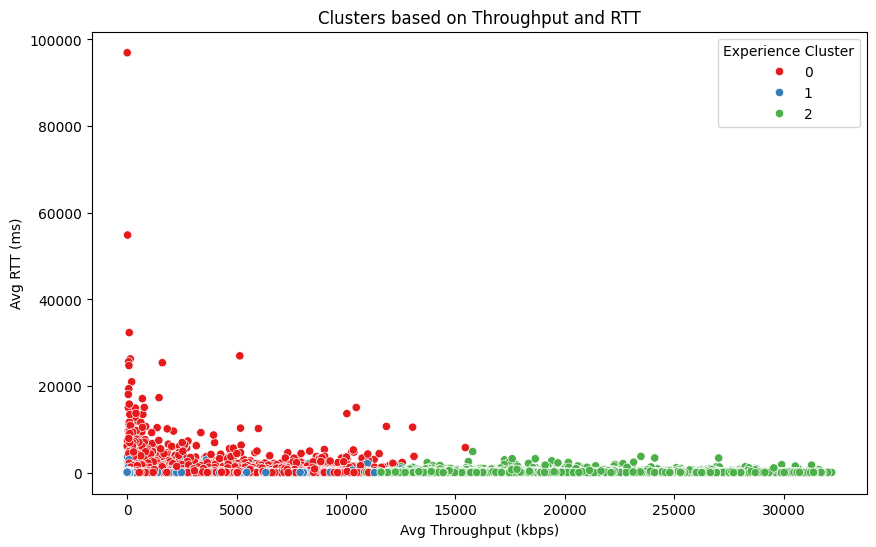

In [19]:
# Plot clusters based on two features at a time
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='Avg Throughput (kbps)', y='Avg RTT (ms)',
    hue='Experience Cluster',
    palette='Set1',
    data=customer_agg
)
plt.title('Clusters based on Throughput and RTT')
plt.show()


In [30]:
customer_agg.head()

,MSISDN/Number,Handset Type,Avg TCP Retransmission (Bytes),Avg RTT (ms),Avg Throughput (kbps),Experience Cluster
0,3.360100e+10,Huawei P20 Lite Huawei Nova 3E,21.777861,46.000000,76.0,0
1,3.360100e+10,Apple iPhone 7 (A1778),21.777861,31.000000,99.0,0
2,3.360100e+10,undefined,21.777861,123.828174,97.0,0
3,3.360101e+10,Apple iPhone 5S (A1457),0.772118,84.000000,248.0,1
4,3.360101e+10,Apple iPhone Se (A1723),15.574346,59.500000,20248.5,0


In [31]:
customer_agg.to_csv('experience_data.csv', index=False)